In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

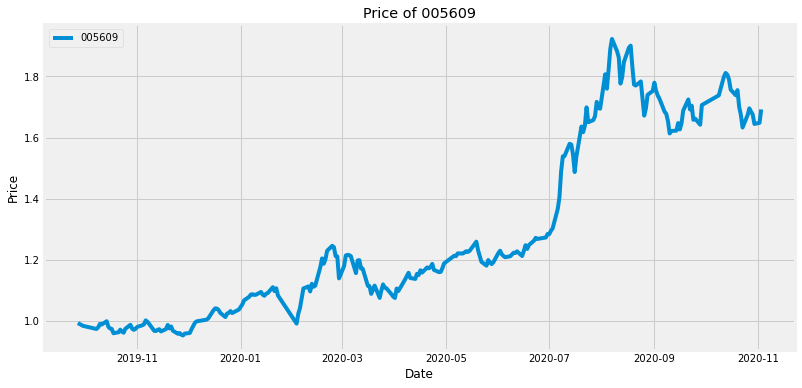

In [2]:
df1=pd.read_excel('C:\\Users\\10690\\Desktop\\量化基金\\军工.xlsx')
df1.index=df1.iloc[:,0]
df1.index=pd.to_datetime(df1.index,format='%y-%m-%d')
plt.figure(figsize=(12,6))
plt.plot(df1['price'],label='005609')
plt.title('Price of 005609')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')

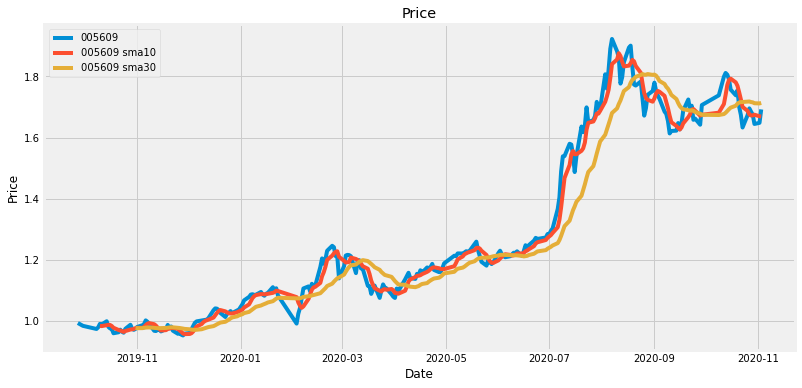

In [3]:
sma10=pd.DataFrame()
sma10['new Price']=df1['price'].rolling(window=5).mean()
sma30=pd.DataFrame()
sma30['new Price']=df1['price'].rolling(window=20).mean()
plt.figure(figsize=(12,6))
plt.plot(df1['price'],label='005609')
plt.plot(sma10['new Price'],label='005609 sma10')
plt.plot(sma30['new Price'],label='005609 sma30')
plt.title('Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')

In [4]:
data=pd.DataFrame()
data['price']=df1['price']
data['sma10']=sma10['new Price']
data['sma30']=sma30['new Price']

def buy_sell(data):
    sigPriceBuy=[]
    sigPriceSell=[]
    flag=-1
    
    for i in range(len(data)):
        if data['sma10'][i]>data['sma30'][i]:
            if flag != 1:
                print('buy')
                print(i)
                print(data.iloc[i])
                sigPriceBuy.append(data['price'][i-0])
                sigPriceSell.append(np.nan)
                flag=1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['sma10'][i]<data['sma30'][i]:
            if flag !=0:
                print('sell')
                print(i)
                print(data.iloc[i])
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['price'][i-0])
                flag=0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy,sigPriceSell)

buy_sell=buy_sell(data)
data['Buy']=buy_sell[0]
data['Sell']=buy_sell[1]

dfresult=data[(pd.notna(data.Buy) | pd.notna(data.Sell))]

sell
19
price    0.973800
sma10    0.975980
sma30    0.976635
Name: 2019-10-31 00:00:00, dtype: float64
buy
20
price    0.980100
sma10    0.977220
sma30    0.975995
Name: 2019-11-01 00:00:00, dtype: float64
sell
29
price    0.972700
sma10    0.973460
sma30    0.975925
Name: 2019-11-14 00:00:00, dtype: float64
buy
44
price    0.993400
sma10    0.973340
sma30    0.970415
Name: 2019-12-05 00:00:00, dtype: float64
sell
80
price    1.02350
sma10    1.06030
sma30    1.07339
Name: 2020-02-04 00:00:00, dtype: float64
buy
85
price    1.09620
sma10    1.08606
sma30    1.08138
Name: 2020-02-11 00:00:00, dtype: float64
sell
107
price    1.171300
sma10    1.187040
sma30    1.196055
Name: 2020-03-12 00:00:00, dtype: float64
buy
126
price    1.157300
sma10    1.128540
sma30    1.113405
Name: 2020-04-09 00:00:00, dtype: float64
sell
156
price    1.198900
sma10    1.203380
sma30    1.207345
Name: 2020-05-26 00:00:00, dtype: float64
buy
164
price    1.20820
sma10    1.21798
sma30    1.21563
Name: 2020-0

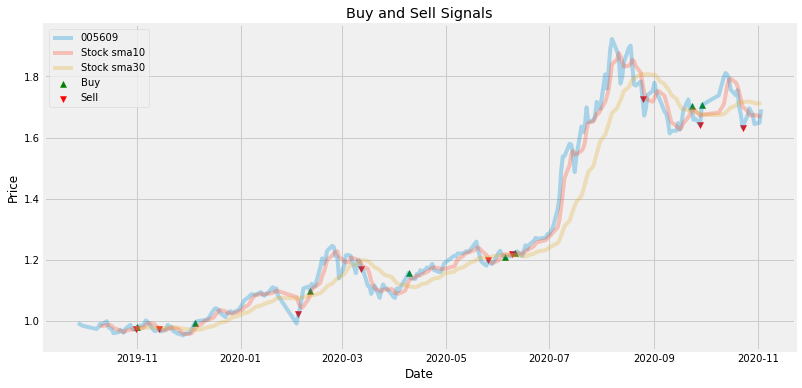

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df1['price'],label='005609',alpha=0.3)
plt.plot(sma10['new Price'],label='Stock sma10',alpha=0.3)
plt.plot(sma30['new Price'],label='Stock sma30',alpha=0.3)
plt.scatter(data.index,data['Buy'],label='Buy',marker='^',color='green')
plt.scatter(data.index,data['Sell'],label='Sell',marker='v',color='red')
plt.title('Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')

## 开始算账

In [6]:
dfresult['newcol']=dfresult.Sell.shift(-1)
dfresult=dfresult[(pd.isna(dfresult.Sell))]
dfresult['pct']=(dfresult.newcol-dfresult.Buy)/dfresult.Buy
dfresult['pct'].to_list()

print("起始金额")
plus=0
minus=0
benjin=1000
start=benjin
print(start)
print('')
for i in dfresult['pct'].to_list()[:-1]:
# for i in dfresult['pct'].to_list():
    if i<0:
        print(1+i)
        start=start*(1+i)
        print("当前亏损，亏损%0.2f 当前本金是%0.2f"%(1+i,start))
        minus+=1
    else:
        print(1+i)
        start=start*(1+i)
        print("当前盈利，涨幅%0.2f 当前本金是%0.2f"%(1+i,start))
        plus+=1
    i=0
#     print('')
print("策略后金额")
print("%0.2f"%(start))
var2=((start-benjin)/benjin)*100
print("累计收益%0.2f%%"%(var2))
print("累计胜负 胜%d，负%d"%(plus,minus))

起始金额
1000

0.9924497500255076
当前亏损，亏损0.99 当前本金是992.45
1.030299979867123
当前盈利，涨幅1.03 当前本金是1022.52
1.068509396095603
当前盈利，涨幅1.07 当前本金是1092.57
1.035945735764279
当前盈利，涨幅1.04 当前本金是1131.85
1.0076146333388514
当前盈利，涨幅1.01 当前本金是1140.47
1.4137140986825956
当前盈利，涨幅1.41 当前本金是1612.29
0.9634454028046705
当前亏损，亏损0.96 当前本金是1553.36
策略后金额
1553.36
累计收益55.34%
累计胜负 胜5，负2


c:\users\10690\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
